# Árboles de decisión y bosques aleatorios en Python

## Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

In [3]:
df = pd.read_csv('breast_cancer.csv')

In [4]:
df.head()

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Análisis exploratorio de datos

Simplemente lo revisaremos con un pairplot simple para este pequeño conjunto de datos.

/home/steve/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/steve/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


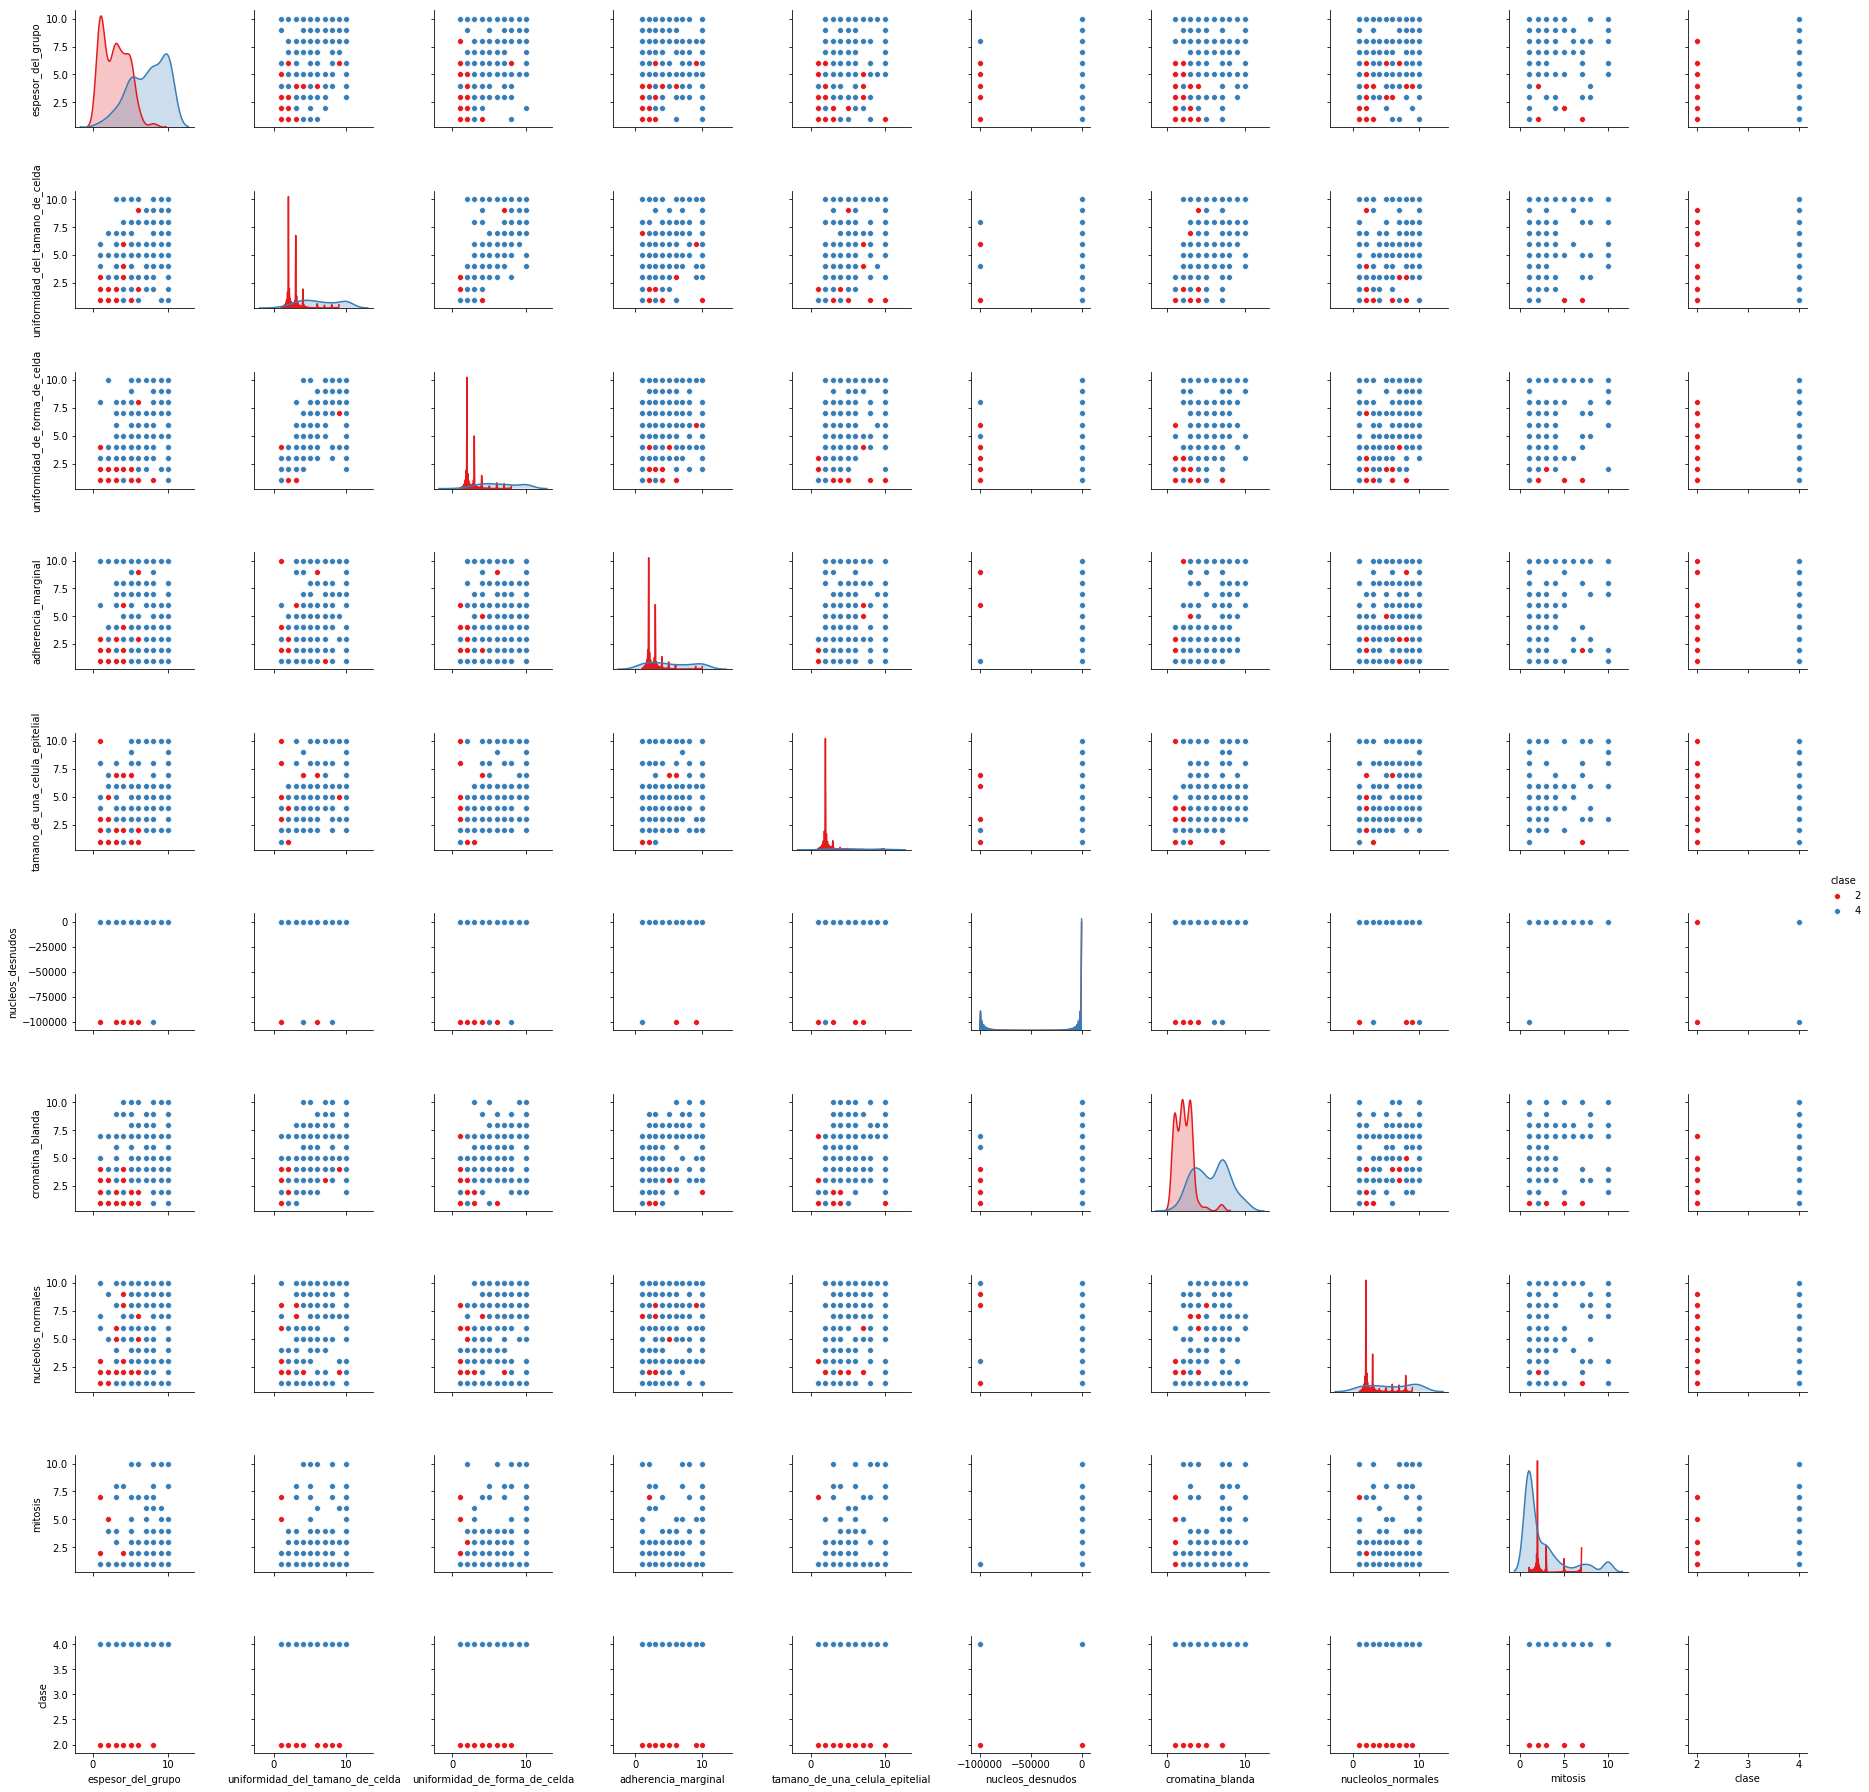

In [5]:
sns.pairplot(df,hue='clase',palette='Set1')

## División en Conjunto de entrenamiento y de prueba

¡Dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('clase',axis=1)
y = df['clase']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Árboles de decisión

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.93      0.95      0.94       107
           4       0.92      0.88      0.90        64

   micro avg       0.92      0.92      0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [15]:
print(confusion_matrix(y_test,predictions))

[[102   5]
 [  8  56]]


## Visualización de árbol

Scikit learn en realidad tiene algunas capacidades de visualización incorporadas para los árboles de decisión, no las usará con frecuencia y requiere que instale la biblioteca pydot, aquí hay un ejemplo de cómo se ve y el código para ejecutarlo:

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['uniformidad_del_tamano_de_celda',
 'uniformidad_de_forma_de_celda',
 'adherencia_marginal',
 'tamano_de_una_celula_epitelial',
 'nucleos_desnudos',
 'cromatina_blanda',
 'nucleolos_normales',
 'mitosis',
 'clase']

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
print(os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/')

:C:/Program Files (x86)/Graphviz2.38/bin/


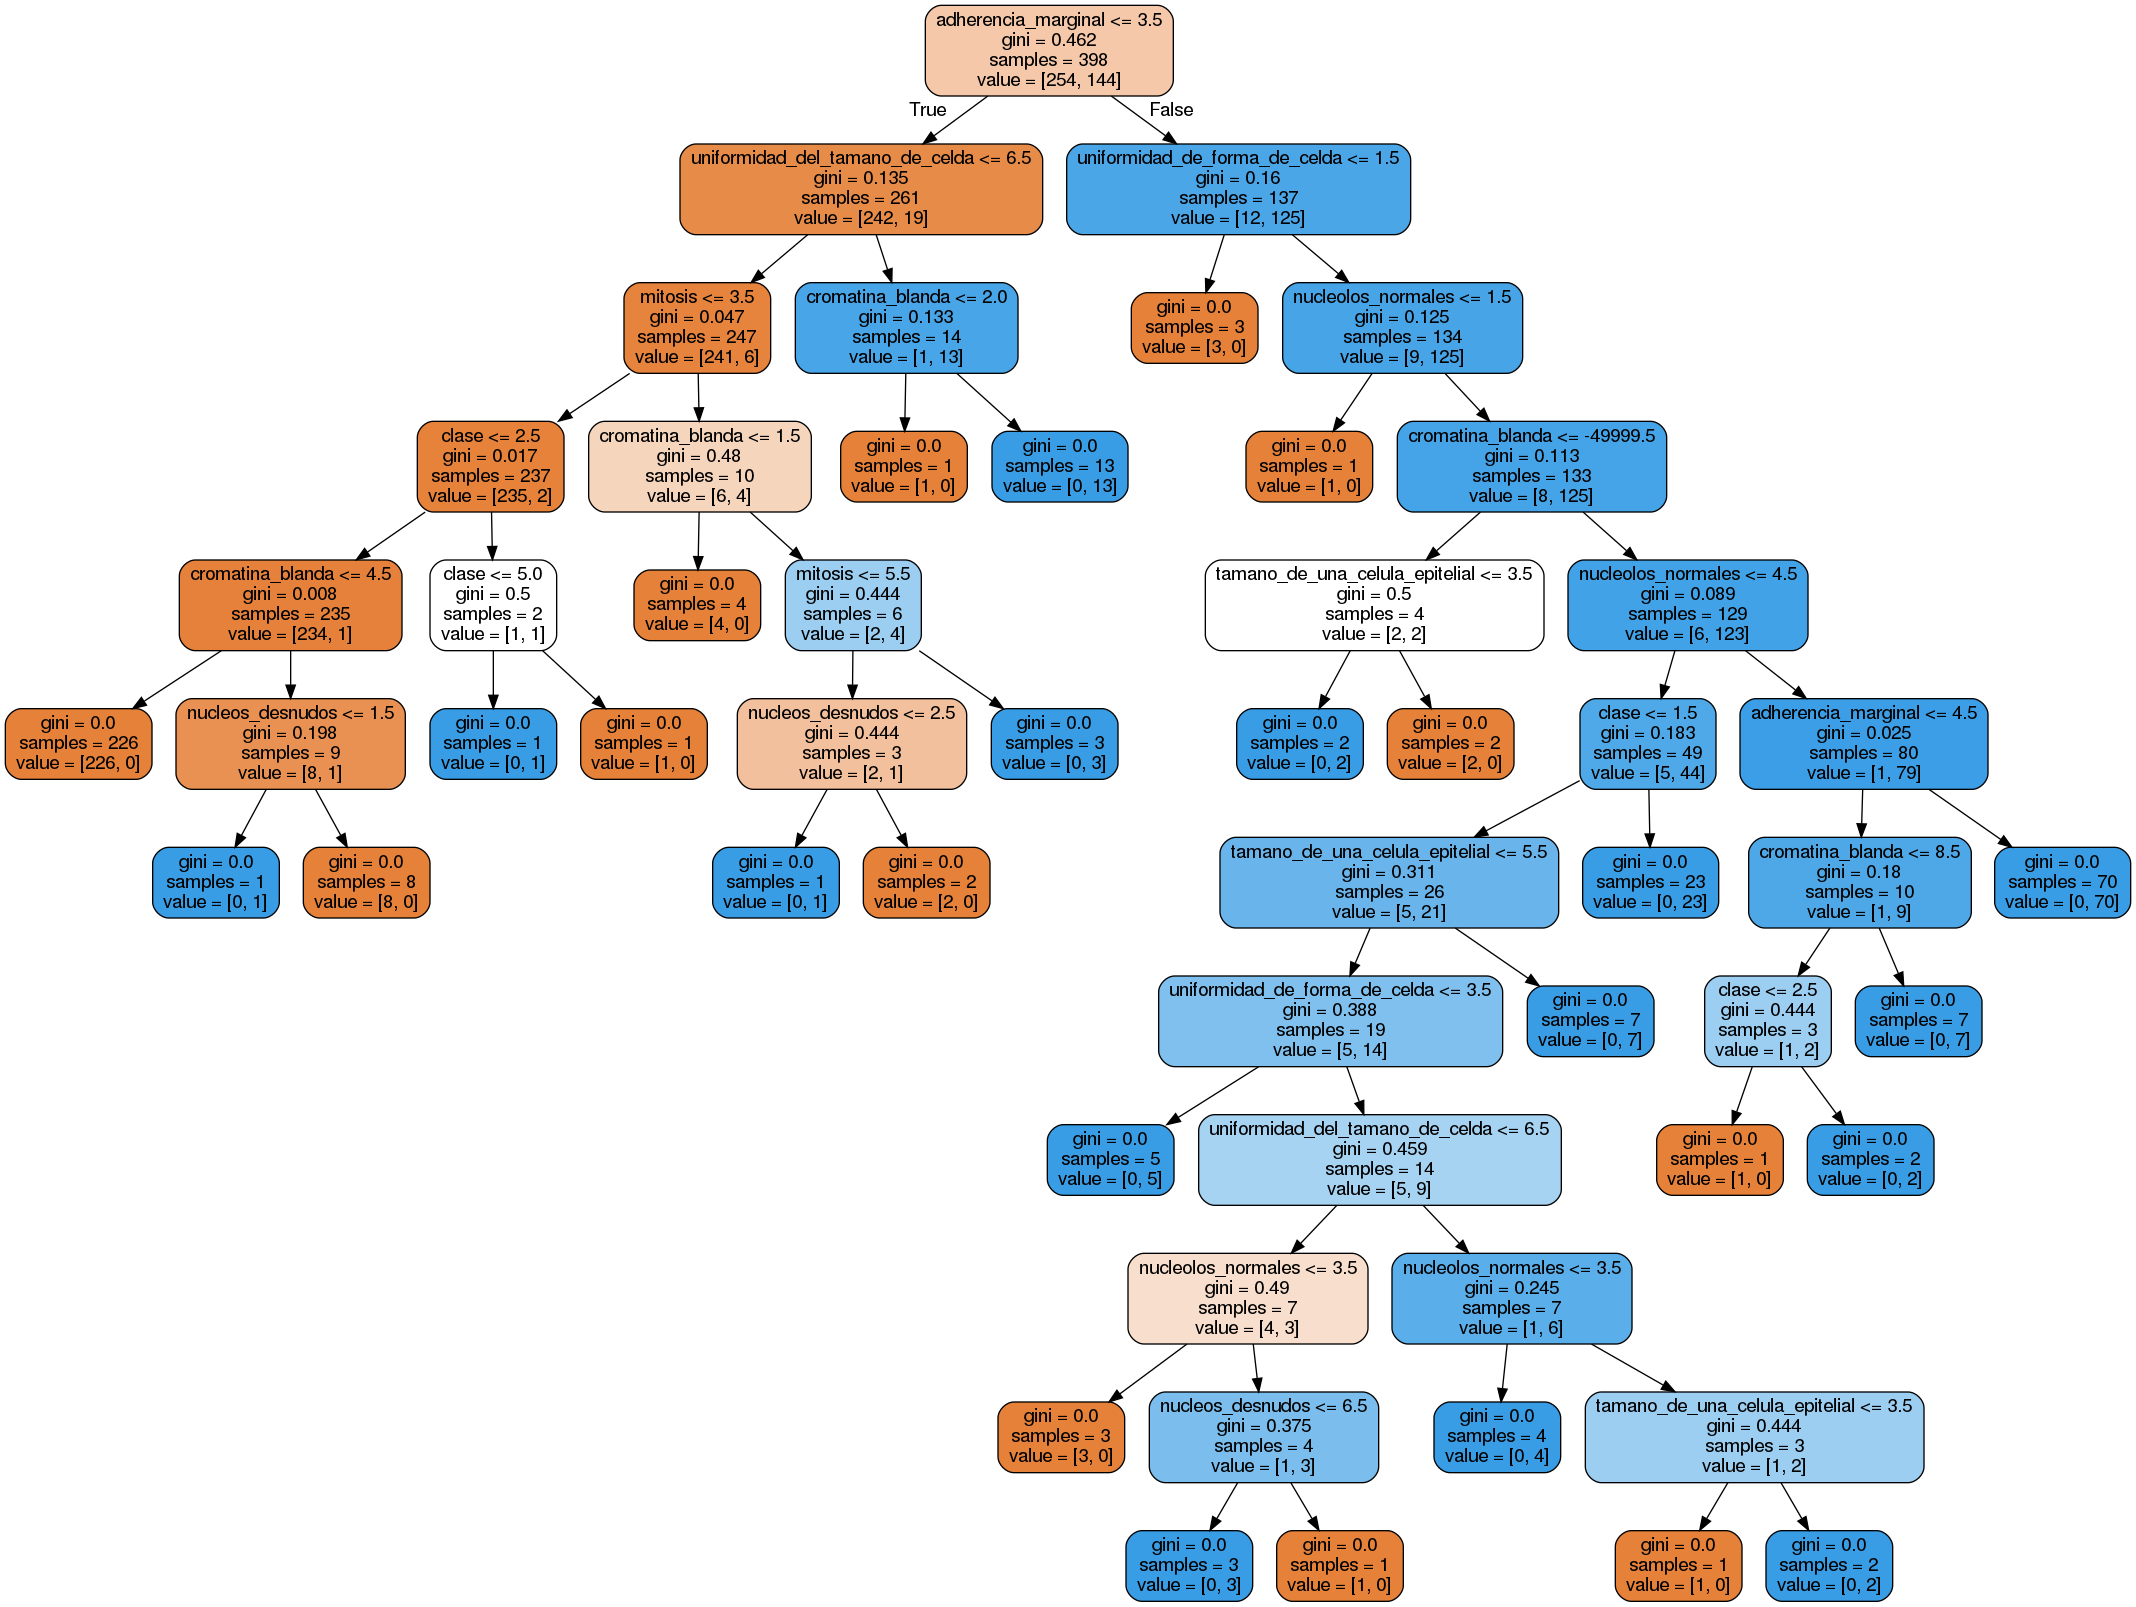

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())